## 1. Load the MNIST Digit dataset, show the size of the training and test set.

Training set shape: (60000, 28, 28) (images) and (60000,) (labels)
Test set shape: (10000, 28, 28) (images) and (10000,) (labels)


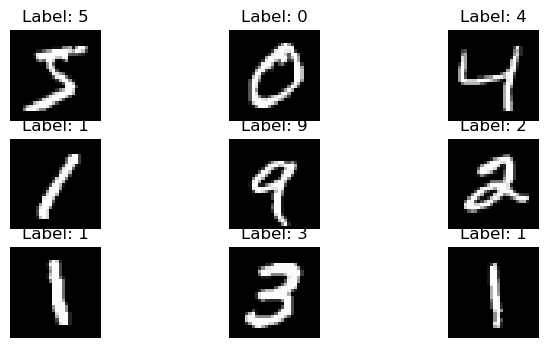

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data(path="mnist.npz")

# Print the shape of the training and testing data
print(f"Training set shape: {X_train.shape} (images) and {y_train.shape} (labels)")
print(f"Test set shape: {X_test.shape} (images) and {y_test.shape} (labels)")

# Plot a few sample images
plt.figure(figsize=(8, 4))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [2]:
# Flatten the images and normalize pixel values
X_train_flat = X_train.reshape(-1, 28 * 28) / 255.0
X_test_flat = X_test.reshape(-1, 28 * 28) / 255.0

In [3]:
X_train_flat.shape,X_test_flat.shape

((60000, 784), (10000, 784))

In [4]:
y_train.dtype,y_test.dtype

(dtype('uint8'), dtype('uint8'))

## 2. Develop a one hidden layer multi-layer perceptron model on the above training data, report the accuracy of the model.

#### Create the MLP Model: We’ll use Keras to define our one-hidden-layer MLP. Here’s a simple architecture:

In [5]:

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(784,)))  # Hidden layer with 128 units
model.add(Dense(units=10, activation='softmax'))  # Output layer (10 classes for digits 0 to 9)


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the Model: Specify the loss function, optimizer, and evaluation metric:

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#### Train the Model: Let’s train our model using the training data:

In [7]:
model.fit(X_train_flat, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8646 - loss: 0.4716 - val_accuracy: 0.9519 - val_loss: 0.1655
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9602 - loss: 0.1363 - val_accuracy: 0.9650 - val_loss: 0.1196
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9748 - loss: 0.0886 - val_accuracy: 0.9696 - val_loss: 0.1024
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9801 - loss: 0.0656 - val_accuracy: 0.9700 - val_loss: 0.1018
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9851 - loss: 0.0492 - val_accuracy: 0.9744 - val_loss: 0.0898
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9883 - loss: 0.0383 - val_accuracy: 0.9758 - val_loss: 0.0822
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9917 - loss: 0.0297 - val_accuracy: 0.9762 - val_loss: 0.0873
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9931 - loss: 0.0238 - 

#### Evaluate Accuracy on Test Set: Finally, let’s see how well our model performs on the test data:

In [8]:
train_loss, train_accuracy = model.evaluate(X_train_flat, y_train)
print(f"Train accuracy: {train_accuracy:.4f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.9955 - loss: 0.0169
Train accuracy: 0.9913


In [9]:
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.9740 - loss: 0.1018
Test accuracy: 0.9774


##  3. From question 2, set the number of hidden layers of the MLP model as [2,4,6,8,10], set the hidden layer size as 100, show the accuracies on the test set.

In [10]:
# Define a function to create an MLP model
def create_mlp(hidden_layers):
    model = Sequential()
    model.add(Dense(units=100, activation='relu', input_shape=(784,)))  # First hidden layer
    for _ in range(hidden_layers - 1):
        model.add(Dense(units=100, activation='relu'))  # Additional hidden layers
    model.add(Dense(units=10, activation='softmax'))  # Output layer (10 classes)
    return model

# Evaluate models with different numbers of hidden layers
hidden_layer_sizes = [2, 4, 6, 8, 10]
for num_layers in hidden_layer_sizes:
    mlp_model = create_mlp(hidden_layers=num_layers)
    mlp_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    mlp_model.fit(X_train_flat, y_train, epochs=10, batch_size=32, validation_split=0.2)
    train_loss, train_accuracy = mlp_model.evaluate(X_train_flat, y_train)
    print(f"Hidden Layers: {num_layers} | Train accuracy: {train_accuracy:.4f}")
    test_loss, test_accuracy = mlp_model.evaluate(X_test_flat, y_test)
    print(f"Hidden Layers: {num_layers} | Test accuracy: {test_accuracy:.4f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8630 - loss: 0.4755 - val_accuracy: 0.9575 - val_loss: 0.1417
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9635 - loss: 0.1208 - val_accuracy: 0.9622 - val_loss: 0.1265
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9778 - loss: 0.0727 - val_accuracy: 0.9673 - val_loss: 0.1055
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9810 - loss: 0.0592 - val_accuracy: 0.9695 - val_loss: 0.1002
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9870 - loss: 0.0423 - val_accuracy: 0.9744 - val_loss: 0.0885
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9892 - loss: 0.0343 - val_accuracy: 0.9708 - val_loss: 0.1056
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9904 - loss: 0.0299 - val_accuracy: 0.9735 - val_loss: 0.0978
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9923 - loss: 0.0228 - 

## 4. From question 2, for the hidden layer set the hidden layer size as [50, 100, 150, 200], show the accuracies on the test set. 

In [11]:
# Define a function to create an MLP model with varying hidden layer size
def create_mlp(hidden_layer_size):
    model = Sequential()
    model.add(Dense(units=hidden_layer_size, activation='relu', input_shape=(784,)))  # Hidden layer
    model.add(Dense(units=10, activation='softmax'))  # Output layer (10 classes)
    return model

# Evaluate models with different hidden layer sizes
hidden_layer_sizes = [50, 100, 150, 200]
for size in hidden_layer_sizes:
    mlp_model = create_mlp(hidden_layer_size=size)
    mlp_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    mlp_model.fit(X_train_flat, y_train, epochs=10, batch_size=32, validation_split=0.2)
    train_loss, train_accuracy = mlp_model.evaluate(X_train_flat, y_train)
    print(f"Hidden Layer Size: {size} | Train accuracy: {train_accuracy:.4f}")
    test_loss, test_accuracy = mlp_model.evaluate(X_test_flat, y_test)
    print(f"Hidden Layer Size: {size} | Test accuracy: {test_accuracy:.4f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8348 - loss: 0.5707 - val_accuracy: 0.9453 - val_loss: 0.1968
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9429 - loss: 0.1917 - val_accuracy: 0.9554 - val_loss: 0.1588
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9588 - loss: 0.1376 - val_accuracy: 0.9613 - val_loss: 0.1356
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9682 - loss: 0.1110 - val_accuracy: 0.9629 - val_loss: 0.1303
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9732 - loss: 0.0893 - val_accuracy: 0.9647 - val_loss: 0.1223
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9768 - loss: 0.0768 - val_accuracy: 0.9668 - val_loss: 0.1127
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9809 - loss: 0.0658 - val_accuracy: 0.9672 - val_loss: 0.1116
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9822 - loss: 0.0580 - 

## 5. Based on question 3 and 4, explain the key findings.

In [14]:
import pandas as pd
layers_performance = {'layers': ['layer_1','layer_2','layer_4','layer_6','layer_8','layer_10',
                               'layer_size_50','layer_size_100','layer_size_150','layer_size_200'],
    'Training Accuracy':['99.26','99.20','98.83','98.82','98.45','98.30','98.64','98.81','99.07','99.29'],
    'Testing Accuracy':['97.76','97.80','97.48','97.42','96.96','97.01','97.22','97.23','97.81','97.84']}


In [16]:
numlayers_layersize = pd.DataFrame(layers_performance)
numlayers_layersize

,layers,Training Accuracy,Testing Accuracy
0,layer_1,99.26,97.76
1,layer_2,99.20,97.80
2,layer_4,98.83,97.48
3,layer_6,98.82,97.42
4,layer_8,98.45,96.96
5,layer_10,98.30,97.01
6,layer_size_50,98.64,97.22
7,layer_size_100,98.81,97.23
8,layer_size_150,99.07,97.81
9,layer_size_200,99.29,97.84
